In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# import DataAPI
pd.set_option('display.width', 200)
dates = pd.date_range('20150101', periods=5)
dates

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05'], dtype='datetime64[ns]', freq='D')

In [2]:
df = pd.DataFrame(np.random.randn(5, 4),index=dates,columns=list('ABCD'))
print(df)
df2 = pd.DataFrame({ 'A' : 1., 'B': pd.Timestamp('20150214'), 'C': pd.Series(1.6,index=list(range(4)),dtype='float64'), 'D' : np.array([4] * 4, dtype='int64'), 'E' : 'hello pandas!' })
df2

                   A         B         C         D
2015-01-01  1.950834 -0.822902  1.646367  0.661556
2015-01-02 -1.381695 -1.252612 -1.260715  0.427220
2015-01-03  0.909765 -1.771192 -0.192882 -0.180278
2015-01-04  1.090804 -1.968350 -0.119453 -0.169635
2015-01-05 -1.476095  0.776455 -1.998816 -0.106536


,A,B,C,D,E
0,1.0,2015-02-14,1.6,4,hello pandas!
1,1.0,2015-02-14,1.6,4,hello pandas!
2,1.0,2015-02-14,1.6,4,hello pandas!
3,1.0,2015-02-14,1.6,4,hello pandas!


In [3]:
stock_list = ['000001.XSHE', '000002.XSHE', '000568.XSHE', '000625.XSHE', '000768.XSHE', '600028.XSHG', '600030.XSHG', '601111.XSHG', '601390.XSHG', '601998.XSHG']
raw_data = DataAPI.MktEqudGet(secID=stock_list, beginDate='20150101', endDate='20150131', pandas='1')
df = raw_data[['secID', 'tradeDate', 'secShortName', 'openPrice', 'highestPrice', 'lowestPrice', 'closePrice', 'turnoverVol']]

NameError: name 'DataAPI' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 隨機產生 10 組 2 features 的資料 500 筆 (dy 即原始目標值 label 0~9)
dx, dy = make_blobs(n_samples=500, n_features=2, centers=10, random_state=42)
# 用 KMeans 在資料中找出 5 個分組
# print(dy)
# kmeans = KMeans(n_clusters=5)
# kmeans.fit(dx)
# 預測新的目標值 label
# new_dy = kmeans.predict(dx)
plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
# 以不同顏色畫出原始的 10 群資料
plt.subplot(121)
plt.title('Original data (10 groups)')
plt.scatter(dx.T[0], dx.T[1],c=dy,cmap=plt.cm.Set1)
# 根據重新分成的 5 組來畫出資料
# plt.subplot(122)
# plt.title('KMeans=5 groups')
# plt.scatter(dx.T[0], dx.T[1], c=new_dy, cmap=plt.cm.Set1)
# # 顯示圖表
plt.tight_layout()
plt.show()

## Q Quant
當前價 spot : 2.45 </n>

行權價 strike: 2.50

到期期限 maturity : 0.25

無風險利率 r : 0.05

波動率 vol : 0.25


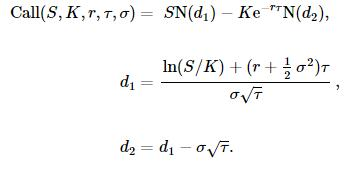

In [5]:
spot = 2.45
strike = 2.5
maturity = 0.25
r = 0.05
vol = 0.25


In [48]:
from math import log,sqrt,exp
from scipy.stats import norm

def call_option_pricer(spot, strike , maturity, r, vol):
    d1 = (log(spot/strike)+(r+0.5*vol*vol)*maturity)/vol/sqrt(maturity)
    d2 = d1 - vol*sqrt(maturity)
    
    price = spot* norm.cdf(d1) - strike*exp(-r*maturity)*norm.cdf(d2)
    return price

call_option_pricer(spot, strike , maturity, r, vol)

0.11332871320482885

In [7]:
import time
import numpy as np
portfolio = range(1,10000,500)
timespent=[]

for size in portfolio:
    now = time.time()
    strikes = np.linspace(2.0,3.0,size)
    for i in range(size):
        res = call_option_pricer(spot, strikes[i], maturity, r, vol)
    timespent.append(time.time()-now)

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, '組合數量')

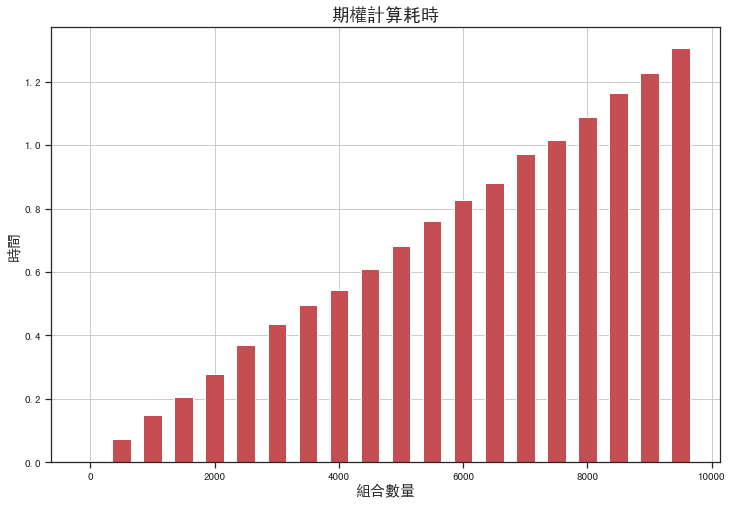

In [22]:
%pylab inline
from matplotlib import pylab
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# font=FontProperties()
# font.set_size(15)


sns.set(style="ticks")
plt.figure(figsize=(12,8))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.bar(portfolio, timespent, color = 'r', width=300)
plt.grid(True)
plt.title('期權計算耗時', fontsize=18)
plt.ylabel('時間', fontsize=15)
plt.xlabel('組合數量', fontsize=15)



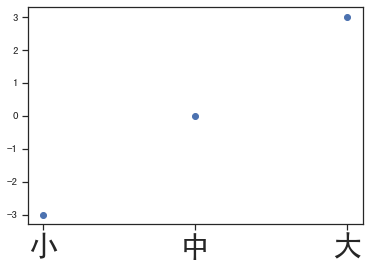

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x_labels = ['小', '中', '大']
x = range(len(x_labels))
y = [-3, 0, 3]

plt.scatter(x, y)
plt.xticks(x,x_labels)
plt.tick_params(axis='x', which='major', labelsize=30)

plt.show()

In [3]:
print(matplotlib.__file__)

C:\Users\VIS\anaconda3\lib\site-packages\matplotlib\__init__.py


### 蒙地卡羅
利用隨機抽樣的方法模仿股價隨機漫步，計算期權價格


仿真的方式可以模擬到期日的股價
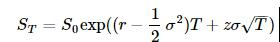

這裡的 z是一個符合標準常態分佈的隨機數，得到最後的期權價格:
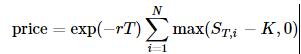


In [24]:
import scipy
scipy.random.randn(10)


array([-0.63538058, -0.35332426, -1.39988111, -0.85362103,  0.22958086,
        0.56275069, -1.15934393, -1.64989337,  0.44071625,  0.30817882])

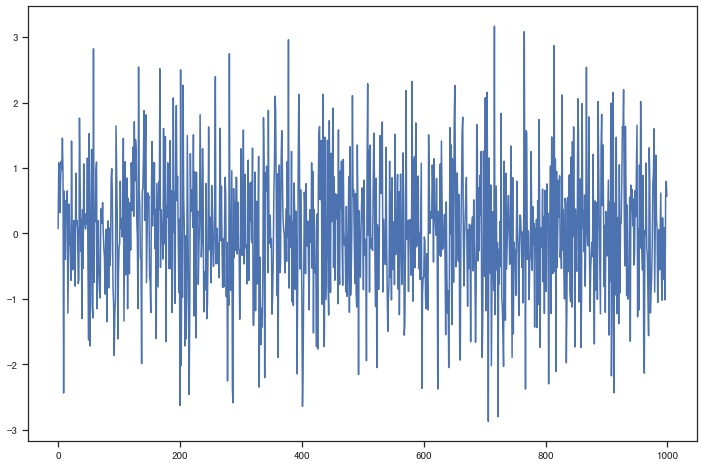

0.03481468020682764
0.9999759834959899


In [31]:
plt.figure(figsize(12,8))
randomSeries = scipy.random.randn(1000)

plt.plot(randomSeries)
plt.show()
print(randomSeries.mean())
print(randomSeries.std())

## Define Monte Carlo
當前價 spot 

行權價 strike

到期期限 maturity 

無風險利率 r 

波動率 vol 

In [37]:
def call_option_pricer_monte_carlo(spot, strike, maturity, r, vol, NumOfPath=5000):
    randomSeries = scipy.random.randn(NumOfPath)
    s_t = spot*exp((r-0.5*vol*vol)*maturity + randomSeries*vol*sqrt(maturity))
    sumValue = np.maximum(s_t - strike, 0.0).sum()
    price = exp(-r*maturity)*sumValue/NumOfPath
    return price
print(spot)
call_option_pricer_monte_carlo(spot, strike, maturity, r, vol)

2.45


0.11264106082879102

In [44]:
pathScenario = range(1000,50000,100)
numberOfTrials = 100
confidenceIntervalUpper =[]
confidenceIntervalLower =[]
means = []

for scenario in pathScenario:
    res = np.zeros(numberOfTrials)
    for i in range(numberOfTrials):
        res[i]= call_option_pricer_monte_carlo(spot, strike, maturity, r, vol, NumOfPath = scenario)
    means.append(res.mean())
    confidenceIntervalUpper.append(res.mean() + 1.96*res.std())
    confidenceIntervalLower.append(res.mean() - 1.96*res.std())
    

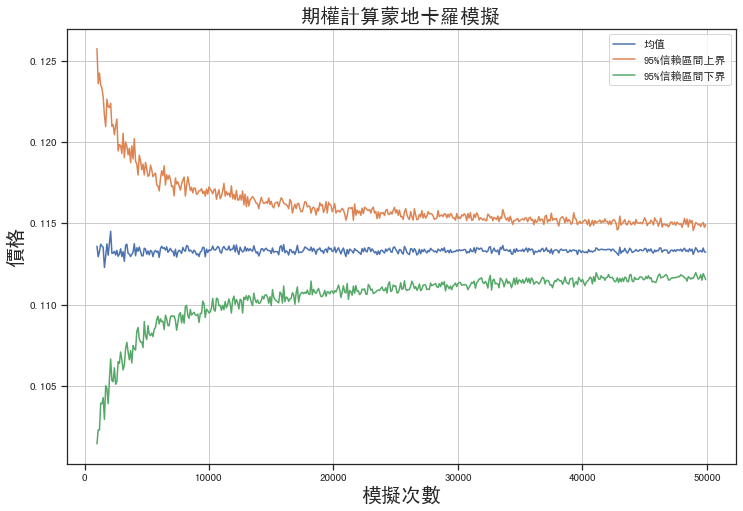

In [45]:
label = np.array([means,confidenceIntervalUpper,confidenceIntervalLower]).T
plt.plot(pathScenario,label)
plt.title('期權計算蒙地卡羅模擬',fontsize=20)
plt.legend(['均值','95%信賴區間上界','95%信賴區間下界'])
plt.ylabel('價格',fontsize=20)
plt.xlabel('模擬次數',fontsize=20)
plt.grid(True)

## 計算隱含波動率
作為BSM期權定價最重要的參數:波動率vol，式標的的資產本身的波動率。
而隱含波動率是當時的報價所反映市場對波動率的估計
當另外四個參數確定，期權價格已知反推波動率:
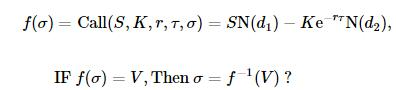

In [52]:
class cost_function:
    def __init__(self,target):
        self.targetValue = target
    
    def __call__(self,x):
        return call_option_pricer(spot, strike, maturity, r,x) - self.targetValue

target = call_option_pricer(spot, strike, maturity, r, vol)
cost_sample = cost_function(target)

implied_vol = scipy.optimize.brentq(cost_sample, 0.01, 0.5)
print('Reality vol: ', vol*100)
print('implied vol: ', implied_vol*100 )

Reality vol:  25.0
implied vol:  24.999999999999982


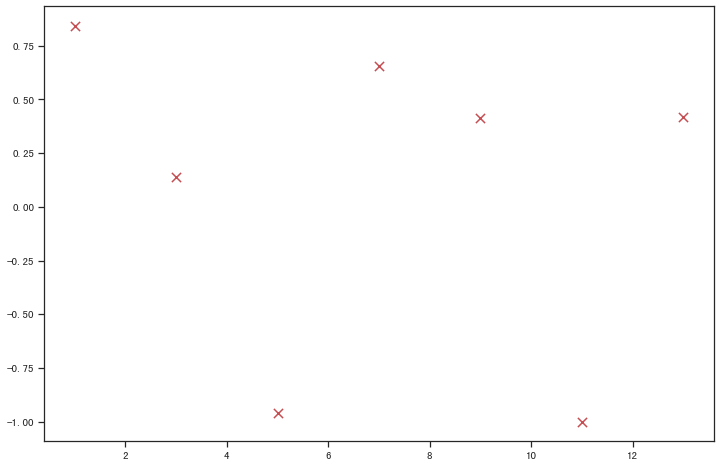

In [65]:
from scipy import interpolate
from scipy.interpolate import make_interp_spline
x = np.linspace(1.0,13.0,7)
y = np.sin(x)
pylab.scatter(x,y,s=85,marker='x',color='r')


### 線性差值法

原式

ynewLinear = interpolate.spline(x,y,xnew,order = 1)

更改成

ynewLinear = make_interp_spline(x,y)(xnew)

Reason:
interpolate中的spline函式已被移除

In [83]:
xnew = np.linspace(1.0,13.0,500)

ynewLinear = make_interp_spline(x,y,k=1)(xnew)
ynewLinear[:5]

array([0.84147098, 0.83304993, 0.82462888, 0.81620782, 0.80778677])

In [85]:
ynewCubicspline = make_interp_spline(x,y,k=3)(xnew)
ynewCubicspline[:5]

array([0.84147098, 0.85704659, 0.87177973, 0.88567993, 0.89875676])

In [86]:
ynewReal = np.sin(xnew)
ynewReal[:5]

array([0.84147098, 0.85421967, 0.86647437, 0.87822801, 0.88947378])

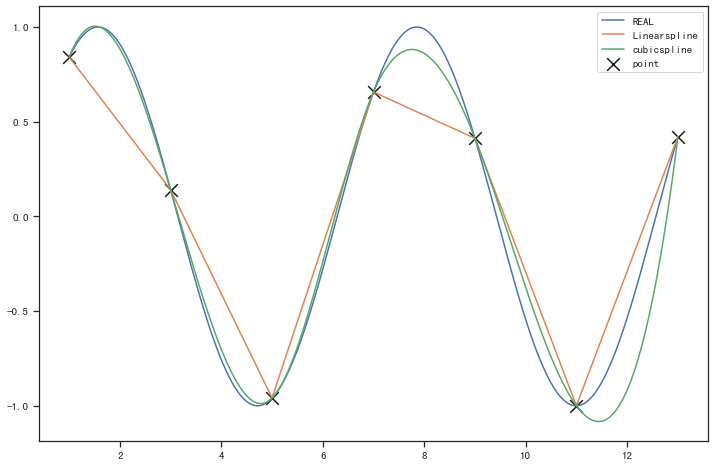

In [89]:
plt.plot(xnew,ynewReal)
plt.plot(xnew,ynewLinear)
plt.plot(xnew,ynewCubicspline)
plt.scatter(x,y,s=160, marker='x',color='k')
plt.legend(['REAL', 'Linearspline','cubicspline','point'])

In [97]:
import pandas as pd
pd.options.display.float_format = '{:,>.2f}'.format

dates = ['20150325',' 20150425', '20150625', '20150925']
strikes = [2.2, 2.3, 2.4, 2.5, 2.6]
blackVolMatrix = np.array([[ 0.32562851,  0.29746885,  0.29260648,  0.27679993],
                  [ 0.28841840,  0.29196629,  0.27385023,  0.26511898],
                  [ 0.27659511,  0.27350773,  0.25887604,  0.25283775],
                  [ 0.26969754,  0.25565971,  0.25803327,  0.25407669],
                  [ 0.27773032,  0.24823248,  0.27340796,  0.24814975]])
table = pd.DataFrame(blackVolMatrix * 100, index = strikes, columns = dates, )
table.index.name = u'行权价'
table.columns.name = u'到期时间'
print(u'2015年3月3日10时波动率矩阵')
table

2015年3月3日10时波动率矩阵


到期时间,20150325,20150425,20150625,20150925
行权价,,,,
2.20,32.56,29.75,29.26,27.68
2.30,28.84,29.20,27.39,26.51
2.40,27.66,27.35,25.89,25.28
2.50,26.97,25.57,25.80,25.41
2.60,27.77,24.82,27.34,24.81


In [100]:
evaluationD = '20150303'
ttm = np.array([(int(d)-int(evaluationD)) / 365.0 for d in dates])
varianceMatrix = (blackVolMatrix**2) **ttm
varianceMatrix

array([[0.87349352, 0.4446305 , 0.11437212, 0.01255392],
       [0.86080916, 0.43911531, 0.10175538, 0.01083827],
       [0.8564766 , 0.42035676, 0.09214439, 0.0092205 ],
       [0.85387321, 0.40181514, 0.09161578, 0.0093754 ],
       [0.85689958, 0.3939736 , 0.10146561, 0.00865072]])

In [101]:
interp = interpolate.interp2d(ttm, strikes, varianceMatrix, kind = 'linear')


In [102]:
interp(ttm[0], strikes[0])


array([0.87349352])

In [105]:
sMeshes = np.linspace(strikes[0], strikes[-1],400)
tMeshes = np.linspace(ttm[0],ttm[-1],200)
interpolatedVarianceSurface = np.zeros((len(sMeshes), len(tMeshes)))
for i ,s in enumerate(sMeshes):
    for j,t in enumerate(tMeshes):
        interpolatedVarianceSurface[i][j] = interp(t,s)
interpolatedVolatilitySurface = np.sqrt((interpolatedVarianceSurface/tMeshes))
print('行權價方向網格數',np.size(interpolatedVolatilitySurface, 0))
print('到期時間方向網格數',np.size(interpolatedVolatilitySurface, 1))

行權價方向網格數 400
到期時間方向網格數 200


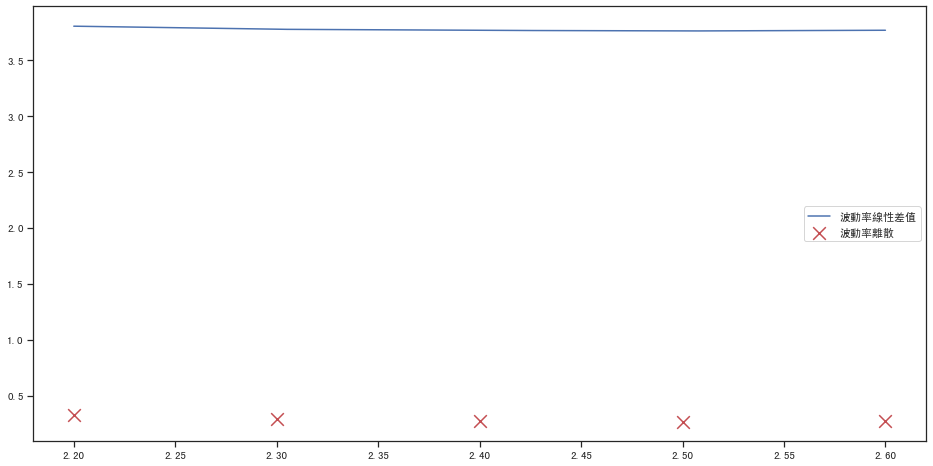

In [106]:
plt.figure(figsize=(16,8))
plt.plot(sMeshes, interpolatedVolatilitySurface[:,0])
plt.scatter(x=strikes,y=blackVolMatrix[:,0],s=160,marker='x',color='r')
plt.legend(['波動率線性差值','波動率離散'])

Text(0.5, 0, 'volatility(%)')

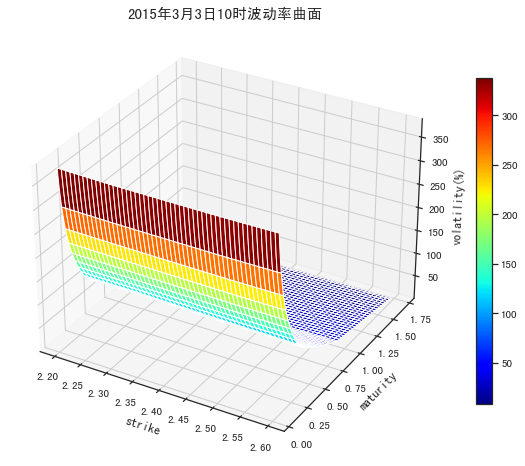

In [107]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
maturityMesher, strikeMesher = np.meshgrid(tMeshes, sMeshes)
ax = pylab.gca(projection = '3d')
surface = ax.plot_surface(strikeMesher, maturityMesher, interpolatedVolatilitySurface*100, cmap = cm.jet)
pylab.colorbar(surface,shrink=0.75)
pylab.title(u'2015年3月3日10时波动率曲面', fontproperties = font)
pylab.xlabel("strike")
pylab.ylabel("maturity")
ax.set_zlabel(r"volatility(%)")